In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#reading train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()


(1460, 81)

In [6]:
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 81 columns):
Id               1455 non-null int64
MSSubClass       1455 non-null int64
MSZoning         1455 non-null object
LotFrontage      1197 non-null float64
LotArea          1455 non-null int64
Street           1455 non-null object
Alley            91 non-null object
LotShape         1455 non-null object
LandContour      1455 non-null object
Utilities        1455 non-null object
LotConfig        1455 non-null object
LandSlope        1455 non-null object
Neighborhood     1455 non-null object
Condition1       1455 non-null object
Condition2       1455 non-null object
BldgType         1455 non-null object
HouseStyle       1455 non-null object
OverallQual      1455 non-null int64
OverallCond      1455 non-null int64
YearBuilt        1455 non-null int64
YearRemodAdd     1455 non-null int64
RoofStyle        1455 non-null object
RoofMatl         1455 non-null object
Exterior1st      1455 non-n

In [24]:
#analysing our target variable
train.SalePrice.describe()

count      1455.000000
mean     180433.811684
std       78651.429700
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      213750.000000
max      755000.000000
Name: SalePrice, dtype: float64

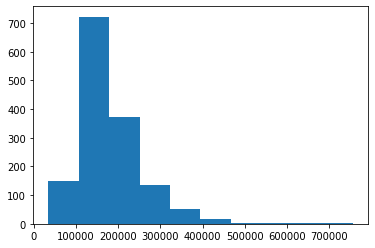

Skewness of SalePrice is: 1.8680517367973368


In [25]:
plt.hist(train.SalePrice)
plt.show()
print ("Skewness of SalePrice is:", train.SalePrice.skew())

Skew is: 0.10747484000747666


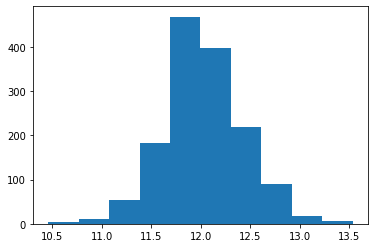

In [26]:
#taking log to unskew SalePrice
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target)
plt.show()

In [27]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [28]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [29]:
correlation = numeric_features.corr()
print (correlation['SalePrice'].sort_values(ascending=False)[:10])
print (correlation['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.794837
GrLivArea       0.733975
TotalBsmtSF     0.644241
GarageCars      0.642238
GarageArea      0.632064
1stFlrSF        0.624208
FullBath        0.561334
TotRmsAbvGrd    0.533782
YearBuilt       0.523884
Name: SalePrice, dtype: float64
BsmtHalfBath    -0.015547
Id              -0.017635
MiscVal         -0.020895
BsmtFinSF2      -0.023464
LowQualFinSF    -0.025162
YrSold          -0.031625
OverallCond     -0.075597
MSSubClass      -0.079790
KitchenAbvGr    -0.136208
EnclosedPorch   -0.139188
Name: SalePrice, dtype: float64


In [30]:
#Exploratory data analysis and pre-processing

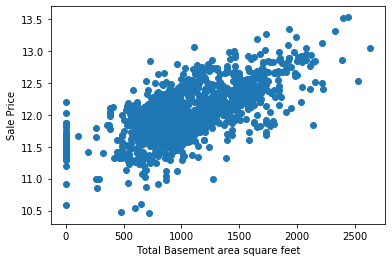

In [31]:
plt.scatter(x=train['TotalBsmtSF'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Total Basement area square feet')
plt.show()

In [32]:
train = train[train['TotalBsmtSF'] < 3000]

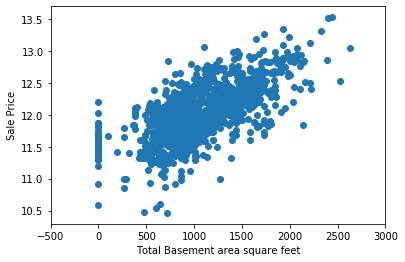

In [33]:
plt.scatter(x=train['TotalBsmtSF'], y=np.log(train.SalePrice))
plt.xlim(-500,3000)
plt.ylabel('Sale Price')
plt.xlabel('Total Basement area square feet')
plt.show()

In [34]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

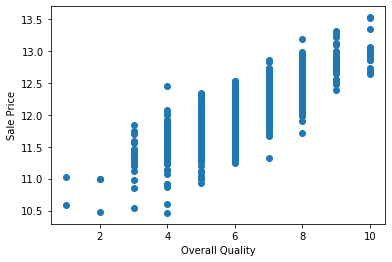

In [35]:
plt.scatter(x=train['OverallQual'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Overall Quality')
plt.show()

In [36]:
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               268750
9               345000
10              438780


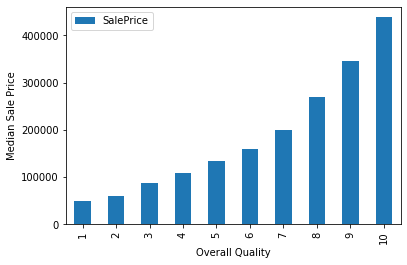

In [37]:
quality_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

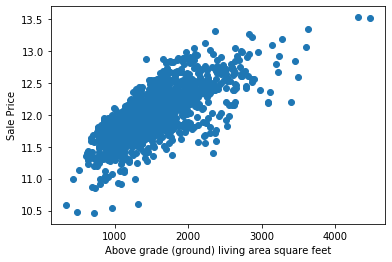

In [38]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

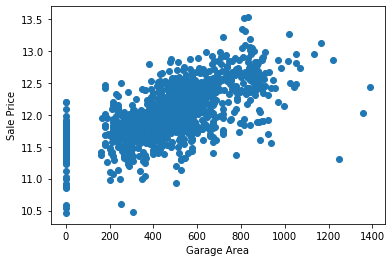

In [39]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [40]:
train = train[train['GarageArea'] < 1200]

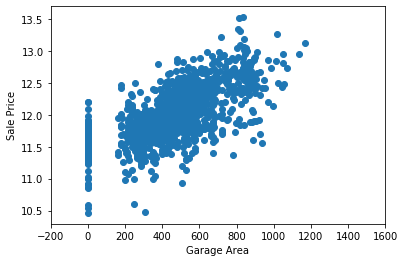

In [41]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [42]:
#Finding Null Values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1445
MiscFeature,1398
Alley,1360
Fence,1170
FireplaceQu,689
LotFrontage,257
GarageCond,81
GarageType,81
GarageYrBlt,81


In [43]:
#Transforming and Engineering Features

In [44]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [45]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1451,1451,91,1451,1451,1451,1451,1451,1451,1451,...,1370,1370,1370,1370,1451,6,281,53,1451,1451
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1143,1446,50,920,1306,1450,1044,1374,225,1254,...,864,605,1302,1317,1331,2,157,48,1263,1193


In [46]:
print ("Original:")
print (train.Street.value_counts(), "\n")

Original:
Pave    1446
Grvl       5
Name: Street, dtype: int64 



In [47]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
print (train.enc_street.value_counts())

1    1446
0       5
Name: enc_street, dtype: int64


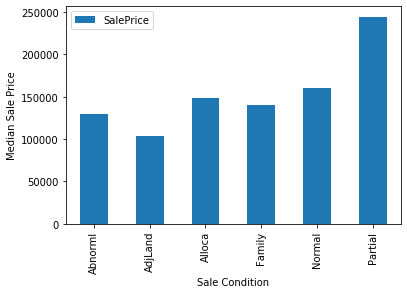

In [48]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.show()

In [49]:
# Partial has highest Median Sale Price. We will encode this as a new feature.
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

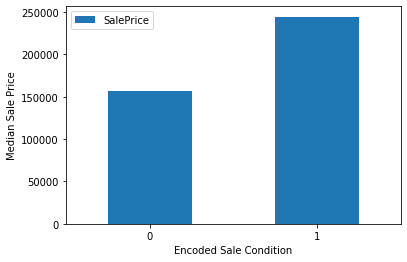

In [50]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [51]:
#fill the missing values with an average value
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [52]:
#checking for missing values
sum(data.isnull().sum() != 0)

0

In [53]:
# Builing our Model and predicting test data

In [54]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [56]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


In [60]:

model = lr.fit(X_train, y_train)


In [59]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8841834188498578


In [104]:
predictions = model.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.018397285674011856


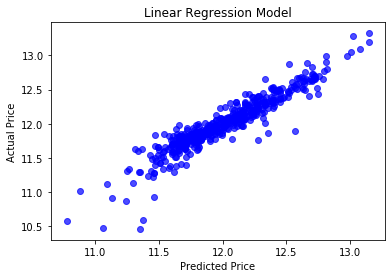

In [106]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

R^2 for Lasso is: 
 0.8833553390463718
RMSE is: 
 0.01852882487638104


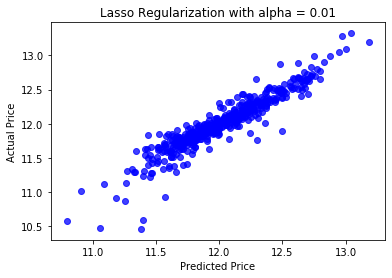

In [107]:
alpha = 0.01
L = linear_model.Lasso(alpha=alpha)
lasso_model = L.fit(X_train, y_train)
preds_lasso = lasso_model.predict(X_test)
print ("R^2 for Lasso is: \n", lasso_model.score(X_test, y_test))
print ('RMSE is: \n', mean_squared_error(y_test, preds_lasso))

plt.scatter(preds_lasso, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regularization with alpha = {}'.format(alpha))
plt.show()

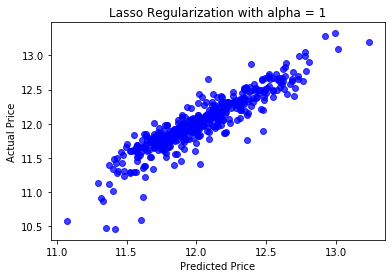

In [108]:
alpha = 1
L = linear_model.Lasso(alpha=alpha)
lasso_model = L.fit(X_train, y_train)
preds_lasso = lasso_model.predict(X_test)

plt.scatter(preds_lasso, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regularization with alpha = {}'.format(alpha))
plt.show()

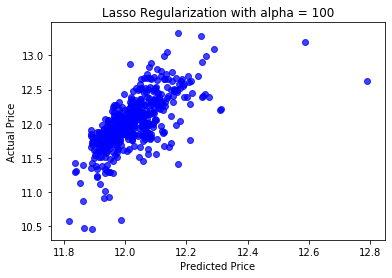

In [66]:
alpha = 100
L = linear_model.Lasso(alpha=alpha)
lasso_model = L.fit(X_train, y_train)
preds_lasso = lasso_model.predict(X_test)

plt.scatter(preds_lasso, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regularization with alpha = {}'.format(alpha))
plt.show()

In [67]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=2000, random_state=1)
forest.fit(X_train, y_train)

#score 
print ("R^2 is: \n",forest.score(X_train, y_train))

R^2 is: 
 0.9834722472629392


In [68]:
newpredictions = forest.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, newpredictions))

RMSE is: 
 0.021037689845587286


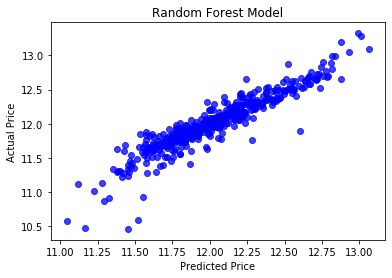

In [65]:
actual_values = y_test
plt.scatter(newpredictions, actual_values, alpha=.75,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')
plt.show()